In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics.pairwise import linear_kernel

In [5]:
dataset = pd.read_csv('ratings.csv')
movie_title = pd.read_csv('movies.csv')

In [6]:
# sample of data
print('dataset :')
print(dataset.head(5))
print('titles :')
print(movie_title.head(5))

dataset :
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
titles :
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [8]:
# combine of data by item id
data = pd.merge(dataset,movie_title , on = 'movieId')

In [9]:
# sample of data
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [10]:
# how many users in system
len(data['userId'].value_counts())

610

In [11]:
# how many movies in system
len(data['title'].unique())

9719

In [12]:
# rating range
max = data['rating'].max()
min = data['rating'].min()
print(f'high rating = {max} , low rating = {min}')

high rating = 5.0 , low rating = 0.5


In [13]:
# get rating count
data_rating = dict(data['rating'].value_counts())
data_rating

{4.0: 26818,
 3.0: 20047,
 5.0: 13211,
 3.5: 13136,
 4.5: 8551,
 2.0: 7551,
 2.5: 5550,
 1.0: 2811,
 1.5: 1791,
 0.5: 1370}

C:\Users\rakhs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: title={'center': 'Rating Count'}>

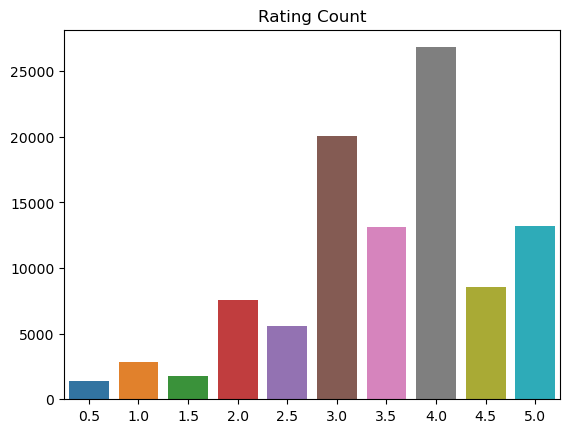

In [14]:
# visualize rating
plt.title('Rating Count')
sns.barplot(x = list(data_rating.keys()), y = list(data_rating.values()))

In [24]:
df = pd.DataFrame()
df['count_rating'] = pd.DataFrame(data.groupby('title')['rating'].count())
df.head(10)

,count_rating
title,
'71 (2014),1
'Hellboy': The Seeds of Creation (2004),1
'Round Midnight (1986),2
'Salem's Lot (2004),1
'Til There Was You (1997),2
'Tis the Season for Love (2015),1
"'burbs, The (1989)",17
'night Mother (1986),1
(500) Days of Summer (2009),42


In [16]:
movie_rate = data.pivot_table(index = 'userId' ,columns = 'title' , values ='rating')
movie_rate.fillna(0 , inplace = True)
movie_rate.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title , min_rating_count = 50):

    user_rating = movie_rate[title]

    similar_movies = movie_rate.corrwith(user_rating)

    corr_movies = pd.DataFrame(similar_movies , columns = ['correlations'])

    corr_movies.dropna(inplace = True)

    corr_movies = corr_movies.join(df['count_rating'], how='left', lsuffix='_left', rsuffix='_right')

    final = corr_movies[corr_movies['count_rating'] > min_rating_count].sort_values('correlations' , ascending = False)

    return final

In [18]:
recommended = get_recommendations('Toy Story (1995)')
recommended.head(10)

,correlations,count_rating
title,,
Toy Story (1995),1.000000,215
Toy Story 2 (1999),0.461761,97
Groundhog Day (1993),0.361540,143
Independence Day (a.k.a. ID4) (1996),0.358473,202
Willy Wonka & the Chocolate Factory (1971),0.357314,119
Mission: Impossible (1996),0.352847,162
"Nutty Professor, The (1996)",0.350295,82
"Bug's Life, A (1998)",0.345431,92
"Lion King, The (1994)",0.344248,172


C:\Users\rakhs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: title={'center': 'Best 10 Movies For Toy Story'}>

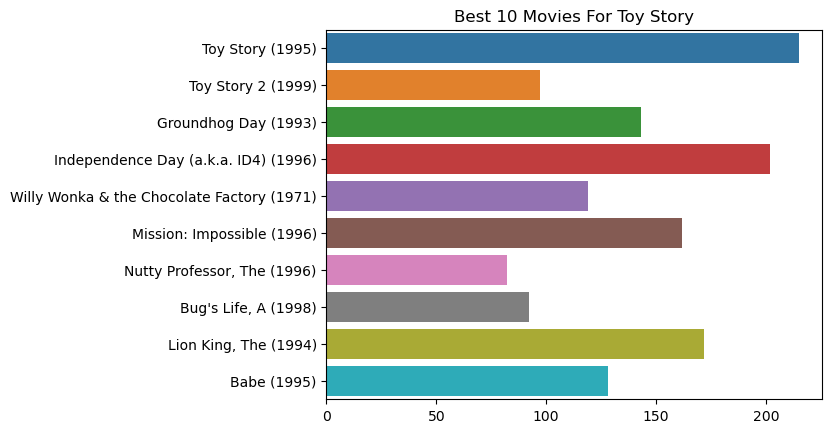

In [19]:
plt.title('Best 10 Movies For Toy Story')
sns.barplot(y = list(recommended.index)[:10] , x = list(recommended['count_rating'])[:10])

In [20]:
recommended = get_recommendations('Ace Ventura: When Nature Calls (1995)')
recommended.head(10)

,correlations,count_rating
title,,
Ace Ventura: When Nature Calls (1995),1.000000,88
Ace Ventura: Pet Detective (1994),0.529725,161
"Mask, The (1994)",0.418776,157
Dumb & Dumber (Dumb and Dumber) (1994),0.413605,133
Jumanji (1995),0.412808,110
"Nightmare Before Christmas, The (1993)",0.388954,93
Happy Gilmore (1996),0.382254,99
Mrs. Doubtfire (1993),0.379447,144
Interview with the Vampire: The Vampire Chronicles (1994),0.378959,109


C:\Users\rakhs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: title={'center': 'Best 10 Movies For Ace Ventura: When Nature Calls (1995'}>

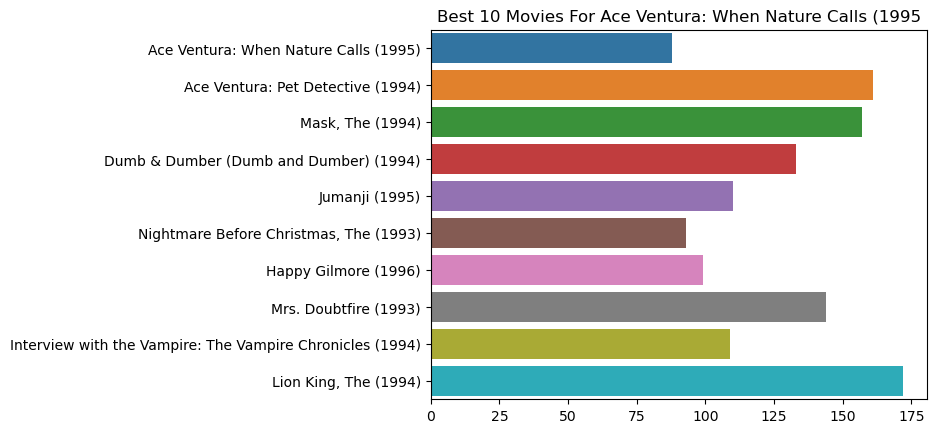

In [21]:
plt.title('Best 10 Movies For Ace Ventura: When Nature Calls (1995')
sns.barplot(y = list(recommended.index)[:10] , x = list(recommended['count_rating'])[:10])

In [22]:
recommended = get_recommendations('Avengers, The (1998)')
recommended.head(10)

,correlations,count_rating
title,,
Batman Returns (1992),0.343087,60
Con Air (1997),0.303365,59
"Mummy, The (1999)",0.289296,87
Blade (1998),0.267875,58
Beetlejuice (1988),0.253760,91
Hook (1991),0.253344,53
The Devil's Advocate (1997),0.246592,51
Dragonheart (1996),0.244112,65
Judge Dredd (1995),0.244107,62


C:\Users\rakhs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: title={'center': 'Best 10 Movies For Avengers, The (1998'}>

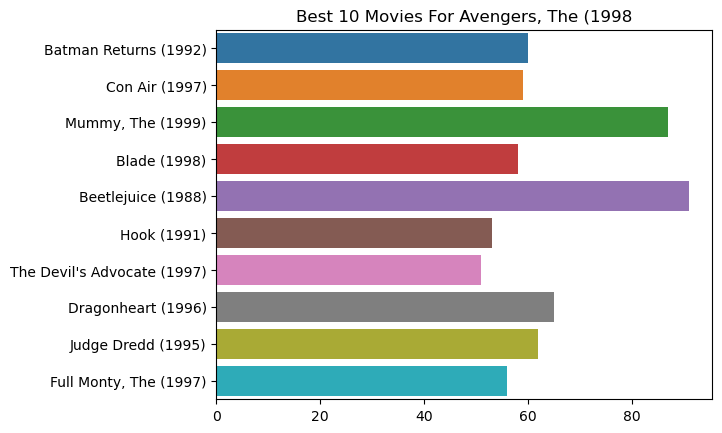

In [23]:
plt.title('Best 10 Movies For Avengers, The (1998')
sns.barplot(y = list(recommended.index)[:10] , x = list(recommended['count_rating'])[:10])